In [151]:
import requests 

def downloadDataSet(url,destNameFile): 
    """
    Download Data Set
    """
    response = requests.get(url)
    if response.status_code == 200: 
        with open(destNameFile, 'wb') as f:
            f.write(response.content)
        
        response.close()
        return True 
    
    response.close()
    print("Request Error , http statuscode : ",response.status_code)
    return False 

In [152]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv"

In [153]:
namaFile = "property_data.csv"
status = downloadDataSet(url,namaFile)
print(status)

True


In [154]:
import pandas as pd
import numpy as np

In [155]:
df = pd.read_csv(namaFile)

In [156]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [158]:
street_num = df.loc[:,['ST_NUM']] #mengakses kolom tertentu
street_num

,ST_NUM
0,104.0
1,197.0
2,NaN
3,201.0
4,203.0
5,207.0
6,NaN
7,213.0
8,215.0


In [159]:
import math 
def highlight_column_nan(column):    
    """
    Function untuk me return background-color
    """
    highlight = 'background-color: palegreen;'
    default = '' 
    return [highlight if math.isnan(v)  else default for v in column]

In [160]:
df.style.apply(highlight_column_nan, subset=['ST_NUM'], axis=0)
#untuk mendeteksi nan pada kolom tertentu

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.000000,104.000000,PUTNAM,Y,3,1,1000
1,100002000.000000,197.000000,LEXINGTON,N,3,1.5,--
2,100003000.000000,nan,LEXINGTON,N,nan,1,850
3,100004000.000000,201.000000,BERKELEY,12,1,nan,700
4,nan,203.000000,BERKELEY,Y,3,2,1600
5,100006000.000000,207.000000,BERKELEY,Y,nan,1,800
6,100007000.000000,nan,WASHINGTON,nan,2,HURLEY,950
7,100008000.000000,213.000000,TREMONT,Y,--,1,nan
8,100009000.000000,215.000000,TREMONT,Y,na,2,1800


In [161]:
#melakukan pengecekan is null pada kolom tertentu
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [162]:
street_num = df.loc[:,['ST_NUM','ST_NAME','NUM_BEDROOMS','OWN_OCCUPIED']]
street_num

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3,Y
1,197.0,LEXINGTON,3,N
2,NaN,LEXINGTON,NaN,N
3,201.0,BERKELEY,1,12
4,203.0,BERKELEY,3,Y
5,207.0,BERKELEY,NaN,Y
6,NaN,WASHINGTON,2,NaN
7,213.0,TREMONT,--,Y
8,215.0,TREMONT,na,Y


In [163]:
import math 

missing_values = ["n/a", "na", "--"]

def highlight_column_missing_values(column):    
    highlight = 'background-color: yellow;'
    default = '' 
    
    return [highlight if str(v) == str(1e400*0) or v in missing_values else default for v in column]

In [164]:
street_num.style.apply(highlight_column_missing_values, subset=['NUM_BEDROOMS'], axis=0)
#melihat apakah ada missing values pada NUM_BEDROOMS

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.000000,PUTNAM,3,Y
1,197.000000,LEXINGTON,3,N
2,nan,LEXINGTON,nan,N
3,201.000000,BERKELEY,1,12
4,203.000000,BERKELEY,3,Y
5,207.000000,BERKELEY,nan,Y
6,nan,WASHINGTON,2,nan
7,213.000000,TREMONT,--,Y
8,215.000000,TREMONT,na,Y


In [165]:
#pengecekan is null
df['NUM_BEDROOMS'].isnull()
#dapat dilihat bahwa index ke 7 dan 8 tidak terdeteksi

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [166]:
#hal yang harus dilakukan adalah membuat list missing values
missing_values = ["n/a", "na", "--"]

In [167]:
df = pd.read_csv(namaFile, na_values = missing_values) #menjadikannya sebagai na

In [168]:
df['NUM_BEDROOMS'] #dapat dilihat bahwa index 7 dan 8 sudah berubah

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [169]:
#saat melakukan pengecekan isnull kembali maka ia sudah berubah menjadi true
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [170]:
#missing value yang tidak terduga
values_real = ["Y", "N", "y","n"]

def highlight_column_creteria_values(column):    
    highlight = 'background-color: yellow;'
    default = '' 
    return [default if v in values_real else highlight for v in column]

In [171]:
#contohnya yaitu jika di dalam data yang kita tentukan adalah string, tetapi saat dilihat jenisnya malah numerik
street_num.style.apply(highlight_column_creteria_values, subset=['OWN_OCCUPIED'], axis=0)

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.000000,PUTNAM,3,Y
1,197.000000,LEXINGTON,3,N
2,nan,LEXINGTON,nan,N
3,201.000000,BERKELEY,1,12
4,203.000000,BERKELEY,3,Y
5,207.000000,BERKELEY,nan,Y
6,nan,WASHINGTON,2,nan
7,213.000000,TREMONT,--,Y
8,215.000000,TREMONT,na,Y


In [172]:
df['OWN_OCCUPIED'].isnull()
#maka saat kita cek dengan isnull maka hasilnya akan false

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [173]:
#disini kita me-looping setiap entri pada kolom OWN_OCCUPIED 
cnt=0
for row in df['OWN_OCCUPIED']:
    try: #(exception handling, untuk menangani errors)
        int(row) #untuk engubah entri menjadi integer
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError: #(exception handling, untuk menangani errors)
        pass
    cnt+=1

In [174]:
#utuk melihat total missing values dari masing-masing kolom
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [175]:
#jika ingin melihat total missing values dari semuanya
df.isnull().sum().sum()

12

In [176]:
#jika ingin mengubah atau mengisi missing values menjadi sebuah nilai
df['ST_NUM'].fillna(125, inplace=True)

In [177]:
df
#dapat dilihat bahwa NaN pada ST_NUM sudah diisi dengan nilai 125

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [178]:
#mengganti atau mengisi missing values dengan median
median = df['NUM_BEDROOMS'].median()
median

3.0

In [179]:
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [180]:
df #NaN pada NUM_BEDROOMS sudah terisi dengan 3.0

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [181]:
#number of unique
import pandas as pd
  
dfz = pd.DataFrame({"A":[2, 4, 7, 4, 9],
                   "B":[10, 3, 23, 8, 4],
                   "C":[1, 12, 5, 2, 11],
                    "D":[21, 15, 6, 4, 17]})

dfz

,A,B,C,D
0,2,10,1,21
1,4,3,12,15
2,7,23,5,6
3,4,8,2,4
4,9,4,11,17


In [182]:
dfz.nunique(axis=1)
#untuk menemukan nilai unik 
#2,10,1,21 -> unik nya ada 4(memiliki nilai yang sama)
#4,3,12,15 -> ada 4
#dst..

0    4
1    4
2    4
3    3
4    4
dtype: int64

In [183]:
dfz.nunique(axis=0)
#2,4,7,4,9 -> unik nya ada 4(sama kaya tadi punya angka sama)
#10,3,23,8,4 -> ada 5
#dst..

A    4
B    5
C    5
D    5
dtype: int64

In [184]:
#men-cek nilai unik dalam banyak data dengan numpy
from numpy import loadtxt
from numpy import unique

data = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', delimiter=',')

print(type(data))

for i in range(data.shape[1]):
    print(i, len(unique(data[:, i])))

<class 'numpy.ndarray'>
0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [185]:
#jika menggunakan pandas
from pandas import read_csv

df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header=None)

dfunik = df.nunique()
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [186]:
#dapat dilihat bahwa beberapa kolom ada yang hanya mengandung sedikit nilai uniknya
#yang dimana mengartikan bahwa ada banyak nilai yang sama, maka dari itu kita perlu
#menghapus kolom yang memiliki nilai unik sedikit
#1. menghapus kolom yang hanya memiliki nilai tunggal yaitu 22 -> 1
from pandas import read_csv
# men-load the dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header=None)
print(df.shape)
# mengambil nilai-nilai unik pada setiap kolom
counts = df.nunique()
# meminta untuk kolom dihapus
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# membuang kolom tersebut
df.drop(to_del, axis=1, inplace=True) 
print(df.shape)


(937, 50)
[22]
(937, 49)


In [187]:
#2. menghapus kolom yang hanya memiliki nilai unik sedikit
counts = df.nunique()
counts

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

In [188]:
#melihat kolom yang hanya memiliki nilai unik sedikit
#meminta untuk menghapus kolom yang hanya memiliki nilai unik sedikit
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1] 
print(to_del)

[21, 23, 24, 25, 31, 35, 37, 38, 44, 48]


In [189]:
print(df.shape)
#drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 49)
(937, 39)


In [190]:
#mencari nilai yang duplikat
# locate rows of duplicate data
from pandas import read_csv
# load the dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv', header=None) # calculate duplicates
dups = df.duplicated()
dups

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [191]:
#melihat data yang duplikat 
print(df[dups])
print(df.shape)

       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica
(150, 5)


In [192]:
#menghapus baris yang memiliki nilai duplikat
df.drop_duplicates(inplace=True)
print(df.shape)

(147, 5)


In [193]:
#yang harus dilakukan jika data ada yang hilang
#contoh data yang digunakan
from pandas import read_csv
# mengambil dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None) # summarize the dataset
print(dataset.shape)
dataset.head()

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [194]:
print(dataset.describe()) #melihat apakah ada data yang hilang
#dapat dilihat bahwa terdapat nilai yang berisi 0.000000
#yang mana dapat dikatakan bahwa itu ada nilai yang tidak valid atau hilang

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [195]:
print(dataset.head(20))
#dapat dilihat bahwa pada kolom 2,3,4,5 terdapat nilai yang berisi 0

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


In [196]:
#melihat berapa jumlah nilai yang kosong pada masing-masing kolom
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [197]:
#mengubah nilai yang bernilai 0 menjadi NaN
from numpy import nan
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)

In [198]:
#menampilkan nya
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

In [199]:
#menghapus baris yang memiliki nilai hilang tersebut
#1. 
dataset.dropna(inplace=True)

In [200]:
#memastikan bahwa data yang memiliki missing values sudah hilang
print(dataset.shape)

(392, 9)


In [201]:
#menggunakan dropna untuk membuang kolom atau baris yang mengandung data yang hilang
from numpy import nan
from pandas import read_csv
#mengambil dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None) # summarize the dataset
print(dataset.shape)
#mengubah 0 atau angka yang hilang menjadi NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
dataset.dropna(inplace=True)


(768, 9)


In [202]:
print(dataset.shape)

(392, 9)


In [203]:
#sekarang kita dapat mengakses nya, dan tidak error kembali
# example where missing values cause errors
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None) # summarize the dataset
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# # define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# # evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy') 
# # report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.781


In [204]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [205]:
import pandas as pd 

In [206]:
%matplotlib inline
data = pd.ExcelFile("obes-phys-acti-diet-eng-2014-tab.xls")
##mengambil file yang sudah di download tadi

In [207]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [208]:
#kita hanya fokus kepada data di sheet 7.2
#dan kita hanya akan mengambil baris ke 5 sampai 18 saja
#karena dilihat dari excel bahwa data 4 teratas dan 14 baris terbawah itu tidak berguna
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [209]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [210]:
data_age.tail()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
11,2012/13,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0


In [211]:
#pada baris pertama terdapat baris kosong pada excel, yang dimana pada kode berisi NaN
#yang harus dilakukan merubah unnamed menjadi year dan membuang baris kosong
#1. meerubah nya
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

In [212]:
#dapat dilihat bahwa unnamed sudah tergantikan dengan year
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [213]:
#2. menghapus baris kosong
data_age.dropna(inplace=True)

In [214]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [215]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 968.0+ bytes


In [216]:
data_age.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [217]:
#mengubah indeks yang tadinya sebuah angka diubah menjadi year
data_age.set_index('Year', inplace=True)

In [218]:
data_age.index

Index(['2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08',
       '2008/09', '2009/10', '2010/11', '2011/12', '2012/13'],
      dtype='object', name='Year')

In [219]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [220]:
data_age.tail()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
2012/13,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0


<AxesSubplot: xlabel='Year'>

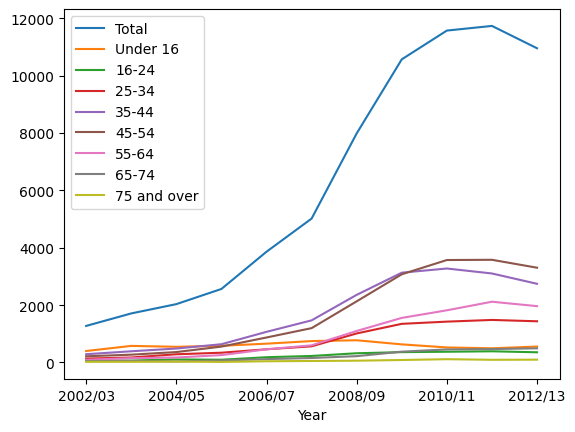

In [221]:
#membuat plot
data_age.plot()

In [222]:
#menghapus Total
data_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot: xlabel='Year'>

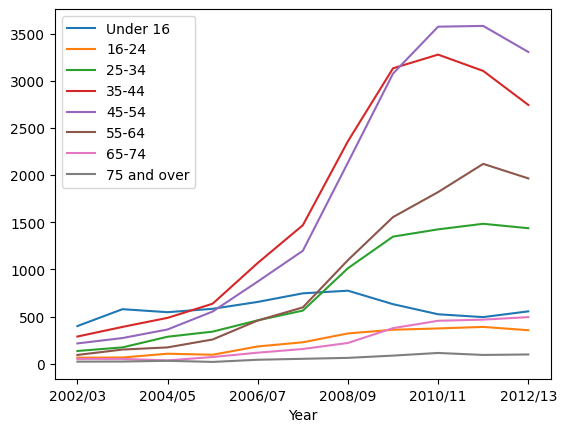

In [223]:
#total sudah terhapus
data_age_minus_total.plot()

<AxesSubplot: xlabel='Year'>

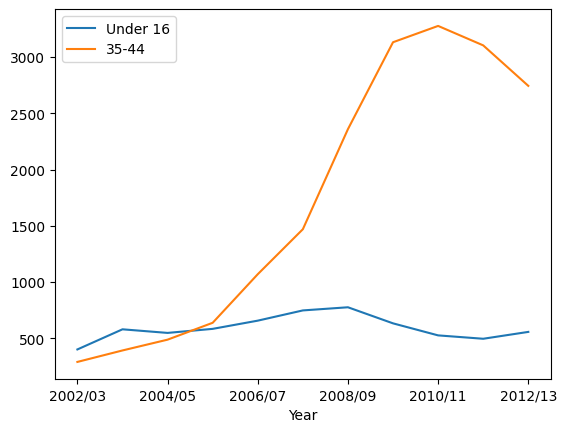

In [224]:
#contoh jika kita ingin melihat kelompok usia yang memiliki obesitas tertinggi
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

maka dapat dinyatakan bahwa saat angka obesitas anak sedikit menurun, orang tua mereka memiliki tingkat obesitas yang tinggi, maka dari itu orang tua harus lebih memperhatikan diri sendiri.

In [225]:
#mengimport libary yang dibutuhkan untuk membuat data range
from datetime import datetime

In [226]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [227]:
#date range memiliki timestamps dengan frekuensi per jam
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [228]:
df = pd.DataFrame(date_rng, columns=['date'])

In [229]:
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [230]:
import numpy as np

In [231]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [232]:
df.head

<bound method NDFrame.head of                    date  data
0   2020-01-01 00:00:00    96
1   2020-01-01 01:00:00     9
2   2020-01-01 02:00:00    57
3   2020-01-01 03:00:00    68
4   2020-01-01 04:00:00    75
..                  ...   ...
164 2020-01-07 20:00:00    65
165 2020-01-07 21:00:00    90
166 2020-01-07 22:00:00    52
167 2020-01-07 23:00:00    66
168 2020-01-08 00:00:00     0

[169 rows x 2 columns]>

In [233]:
#jika kita ingin memanipulasi time series, maka kita harus memiliki date time
#index agar data frame kita di indeks pada timestampl 
#menjadikan dateyime menjadi index
df['datetime'] = pd.to_datetime(df['date'])

In [234]:
df

,date,data,datetime
0,2020-01-01 00:00:00,96,2020-01-01 00:00:00
1,2020-01-01 01:00:00,9,2020-01-01 01:00:00
2,2020-01-01 02:00:00,57,2020-01-01 02:00:00
3,2020-01-01 03:00:00,68,2020-01-01 03:00:00
4,2020-01-01 04:00:00,75,2020-01-01 04:00:00
...,...,...,...
164,2020-01-07 20:00:00,65,2020-01-07 20:00:00
165,2020-01-07 21:00:00,90,2020-01-07 21:00:00
166,2020-01-07 22:00:00,52,2020-01-07 22:00:00
167,2020-01-07 23:00:00,66,2020-01-07 23:00:00


In [250]:
df = df.set_index('datetime')
df 

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,96
2020-01-01 01:00:00,2020-01-01 01:00:00,9
2020-01-01 02:00:00,2020-01-01 02:00:00,57
2020-01-01 03:00:00,2020-01-01 03:00:00,68
2020-01-01 04:00:00,2020-01-01 04:00:00,75
...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,65
2020-01-07 21:00:00,2020-01-07 21:00:00,90
2020-01-07 22:00:00,2020-01-07 22:00:00,52


In [251]:
df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=169, freq=None)

In [252]:
df.drop(['date'], axis=1, inplace=True)

In [253]:
df.head()

,data
datetime,
2020-01-01 00:00:00,96
2020-01-01 01:00:00,9
2020-01-01 02:00:00,57
2020-01-01 03:00:00,68
2020-01-01 04:00:00,75


In [254]:
#jika time stamps dalam data kita sebenarnya berjenis string atau numerik
#contoh mengubah date_rng menjadi list of string dan mengubah string tersebut menjadi stempel waktu
string_date_rng = [str(x) for x in date_rng]

In [255]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [256]:
#melihat formatnya
pd.to_datetime?

Signature:
pd.to_datetime(
    arg: 'DatetimeScalarOrArrayConvertible | DictConvertible',
    errors: 'DateTimeErrorChoices' = 'raise',
    dayfirst: 'bool' = False,
    yearfirst: 'bool' = False,
    utc: 'bool | None' = None,
    format: 'str | None' = None,
    exact: 'bool' = True,
    unit: 'str | None' = None,
    infer_datetime_format: 'bool' = False,
    origin='unix',
    cache: 'bool' = True,
) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
Docstring:
Convert argument to datetime.

This function converts a scalar, array-like, :class:`Series` or
:class:`DataFrame`/dict-like to a pandas datetime object.

Parameters
----------
arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
    The object to convert to a datetime. If a :class:`DataFrame` is provided, the
    method expects minimally the following columns: :const:`"year"`,
    :const:`"month"`, :const:`"day"`.
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If :con

In [257]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [258]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [264]:
#membuat daftar tanggal yang berubah-ubah menjadi string dan mengubahnya menjadi timestamps
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [265]:
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]

In [266]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [267]:
#memasukkan data tadi ke dalam data frame
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])

In [268]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [270]:
#kembali ke dataframe asli, kita ingin melihat datanya dengan parsing pada timestamp index
df[df.index.day == 2] #melihat data yang tanggal 2 setiap bulannya

,data
datetime,
2020-01-02 00:00:00,3
2020-01-02 01:00:00,76
2020-01-02 02:00:00,10
2020-01-02 03:00:00,92
2020-01-02 04:00:00,63
2020-01-02 05:00:00,69
2020-01-02 06:00:00,72
2020-01-02 07:00:00,88
2020-01-02 08:00:00,0


In [271]:
#kita dapat memanggil tanggal yang kita lihat melalui inder dari data frame
df['2020-01-03']
#df.loc['2020-01-03']

C:\Users\USER\AppData\Local\Temp\ipykernel_6416\2064362070.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,68
2020-01-03 01:00:00,39
2020-01-03 02:00:00,85
2020-01-03 03:00:00,58
2020-01-03 04:00:00,7
2020-01-03 05:00:00,14
2020-01-03 06:00:00,93
2020-01-03 07:00:00,3
2020-01-03 08:00:00,83


In [272]:
#memilih data diantara tanggal tertentu
df['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,25
2020-01-04 01:00:00,95
2020-01-04 02:00:00,45
2020-01-04 03:00:00,57
2020-01-04 04:00:00,75
...,...
2020-01-06 19:00:00,10
2020-01-06 20:00:00,8
2020-01-06 21:00:00,51


In [273]:
df.resample?

Signature:
df.resample(
    rule,
    axis: 'Axis' = 0,
    closed: 'str | None' = None,
    label: 'str | None' = None,
    convention: 'str' = 'start',
    kind: 'str | None' = None,
    loffset=None,
    base: 'int | None' = None,
    on: 'Level' = None,
    level: 'Level' = None,
    origin: 'str | TimestampConvertibleTypes' = 'start_day',
    offset: 'TimedeltaConvertibleTypes | None' = None,
    group_keys: 'bool | lib.NoDefault' = <no_default>,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time series.
The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
series/index to the ``on``/``level`` keyword parameter.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object representing target conversion.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Which axis to use for up- or d

In [ ]:
#mengambil min,max,mead dll dari data frekuensi harian

In [274]:
# Day = D      
#  3 minute = 3T 
# 30 second = 30S
df.resample('D').mean()

,data
datetime,
2020-01-01,57.958333
2020-01-02,52.666667
2020-01-03,53.833333
2020-01-04,48.750000
2020-01-05,49.083333
2020-01-06,43.791667
2020-01-07,59.750000
2020-01-08,0.000000


In [275]:
#membuat kolom baru di dataframe asli
df['rolling_sum'] = df.rolling(3).sum()

In [276]:
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,96,NaN
2020-01-01 01:00:00,9,NaN
2020-01-01 02:00:00,57,162.0
2020-01-01 03:00:00,68,134.0
2020-01-01 04:00:00,75,200.0


In [277]:
#terdapat data yang hilang pada rolling_sum
#maka kira akan melakukan forward atau backfilling data
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [278]:
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,96,NaN,162.0
2020-01-01 01:00:00,9,NaN,162.0
2020-01-01 02:00:00,57,162.0,162.0
2020-01-01 03:00:00,68,134.0,134.0
2020-01-01 04:00:00,75,200.0,200.0


In [235]:
#cara mendeteksi missing values
import pandas as pd
dfa = pd.DataFrame([[6,4,1], [7,2,8], [9,3,2]], columns=list("ABC"))
dfa

,A,B,C
0,6,4,1
1,7,2,8
2,9,3,2


In [236]:
dfa.apply

<bound method DataFrame.apply of    A  B  C
0  6  4  1
1  7  2  8
2  9  3  2>

In [237]:
dfa.apply(lambda x : x['B'], axis =1) # 'B' menandakan bahwa hanya mengambil data berdasarkan huruf yang kita pilih

0    4
1    2
2    3
dtype: int64

In [238]:
dfa.iloc[0:1] #hanya mengakses baris ke-0 -> tercetak dalam bentuk baris

,A,B,C
0,6,4,1


In [239]:
dfa.loc[0:1] #megakses baris ke 0 dan 1

,A,B,C
0,6,4,1
1,7,2,8


In [240]:
dfa.iloc[0] #tercetak dalam bentuk kolom

A    6
B    4
C    1
Name: 0, dtype: int64

In [241]:
#jika ingin memberikan warna pada data frame
#akan berwarna jika data lebih besar dari baris 1 [7,2,8] -> x.iloc[]
dfa.style.apply(lambda x: ["background: blue" if v >= x.iloc[1] else "" for v in x], axis = 0)

,A,B,C
0,6,4,1
1,7,2,8
2,9,3,2


In [242]:
#menhasilkan data yang berisikan nilai 4,9 sebanyak 3 baris dan 2 kolom
dfx = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
dfx

,A,B
0,4,9
1,4,9
2,4,9


In [243]:
dfx.apply(np.sqrt) #sqrt adalah akar kuadrat dari dataframe diatas

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [244]:
dfx.apply(np.sum, axis=0) #menjumlahkan masing-masing kolom A dan B

A    12
B    27
dtype: int64

In [245]:
dfx.apply(np.sum, axis=1) #menjumlahkan masing-masing baris

0    13
1    13
2    13
dtype: int64

In [246]:
dfx.apply(lambda x: [1, 2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [247]:
#sanity check (untuk mengetahui apakah ada data yang abnormal)
try :
    pd.read_cvs('data/big-random.csv')
except Exception as err:
    print(err)

module 'pandas' has no attribute 'read_cvs'


In [248]:
dfx.apply(lambda x:[1, 2], axis=1, result_type='expand')
#kolom akan menampilkan angka mengikuti seperti hasil

,0,1
0,1,2
1,1,2
2,1,2


In [249]:
dfx.apply(lambda x: pd.Series([1, 2], index=['foo', 'bar']), axis=1)
#mencetak index foo bar pada keterangan kolom

,foo,bar
0,1,2
1,1,2
2,1,2
